#### Amazinum. Lesson 11. Evaluation. Moisei. Trying evaluate breast cancer datasets

#### Load all libraries and dataset, slip and train, clf

In [137]:
# Importing necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Loading the breast cancer data set
diabetes_data = load_breast_cancer()

# Creating independent and dependent variables
X = diabetes_data.data
y = diabetes_data.target

# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

# Training a binary classifier using Random Forest Algorithm with default hyperparameters
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

# Here X_test, y_test are the test data points
predictions = clf.predict(X_test)

Train Data: (455, 30), (455,)
Train Data: (114, 30), (114,)


#### Accuracy: total numbers of correctly preticted to total numbers of samples

In [138]:
# Importing all necessary libraries
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

Accuracy of the classifier is: 0.9473684210526315


#### Confusion Matrix to show our evaluation with clf

[[39  2]
 [ 4 69]]


C:\Users\Evolu\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<IPython.core.display.Javascript object>


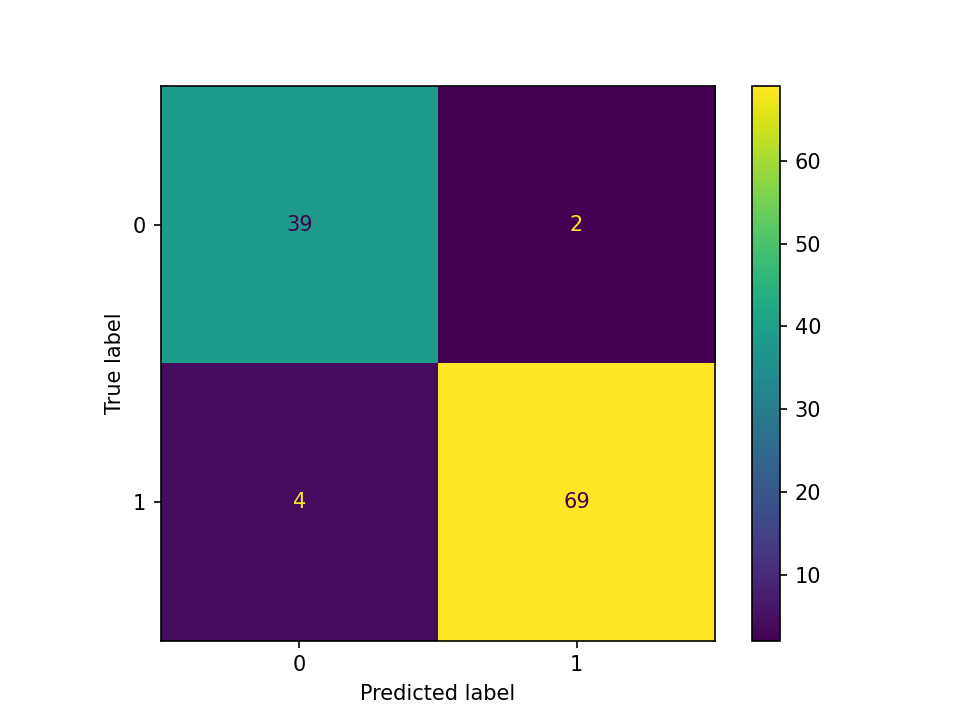

In [139]:
# importing all necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, predictions))

# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

### From the above confusion matrix:
- True Positives (TP): 39,
- False positives (FP): 4,
- True Negatives (TN): 69,
- False Negatives (FN): 2.
#### Accuracy = (TP + TN) / (TP + FP + TN + FN) = (39+69) / (39+69+4+2) = 0.947 = 94.7% - as we can see above

#### Precision (or Positive Predictive Value)

In [140]:
# Importing all necessary libraries
from sklearn.metrics import precision_score

# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

Precision Score of the classifier is: 0.971830985915493


#### Recall (or Sensitivity or True Positive Rate)

In [141]:
# Importing all necessary libraries
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

Recall Score of the classifier is: 0.9452054794520548


#### F1 Score

In [142]:
# Importing all necessary libraries
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")#### F1 Score

F1 Score of the classifier is: 0.9583333333333334


#### AUC-ROC Curve (Receiver Operating Characteristic Curve and Area Under Curve)

AUC for our classifier is: 0.9746074173070498


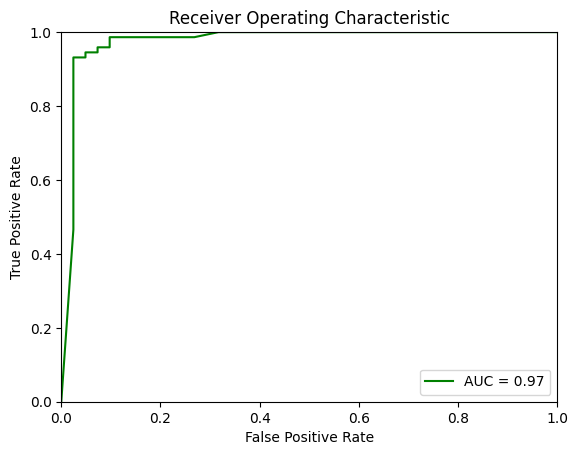

In [33]:
# Importing all necessary libraries
from sklearn.metrics import roc_curve, auc

class_probabilities = clf.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### All our results

In [143]:
print ('accuracy = {:.2}'.format(accuracy_score(y_test, predictions)))
print ('recall = {:.2}'.format(recall_score(y_test, predictions)))
print ('precision = {:.2}'.format(precision_score(y_test, predictions)))
print ('f1_score  = {:.2}'.format(f1_score(y_test, predictions)))

accuracy = 0.95
recall = 0.95
precision = 0.97
f1_score  = 0.96


#### Classification report

In [144]:
from sklearn.metrics import classification_report

print (classification_report(y_test, predictions, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.91      0.95      0.93        41
    Positive       0.97      0.95      0.96        73

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



#### Probability of prediction (0 and 1)

In [145]:
clf.predict_proba(X_test)

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.39, 0.61],
       [1.  , 0.  ],
       [0.7 , 0.3 ],
       [0.91, 0.09],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.04, 0.96],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.83, 0.17],
       [0.56, 0.44],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.03, 0.97],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.73, 0.27],
       [0.11, 0.89],
       [0.01, 0.99],
       [0.04, 0.96],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.95, 0.05],
       [0.92, 0.08],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.  , 1.  ],
       [0.11, 0.89],
       [0.  , 1.  ],
       [0.03, 0.97],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.01, 0.99],
       [0.03, 0.97],
       [0.6 , 0.4 ],
       [0.9 ,

#### Precision Recall Curve

C:\Users\Evolu\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<IPython.core.display.Javascript object>


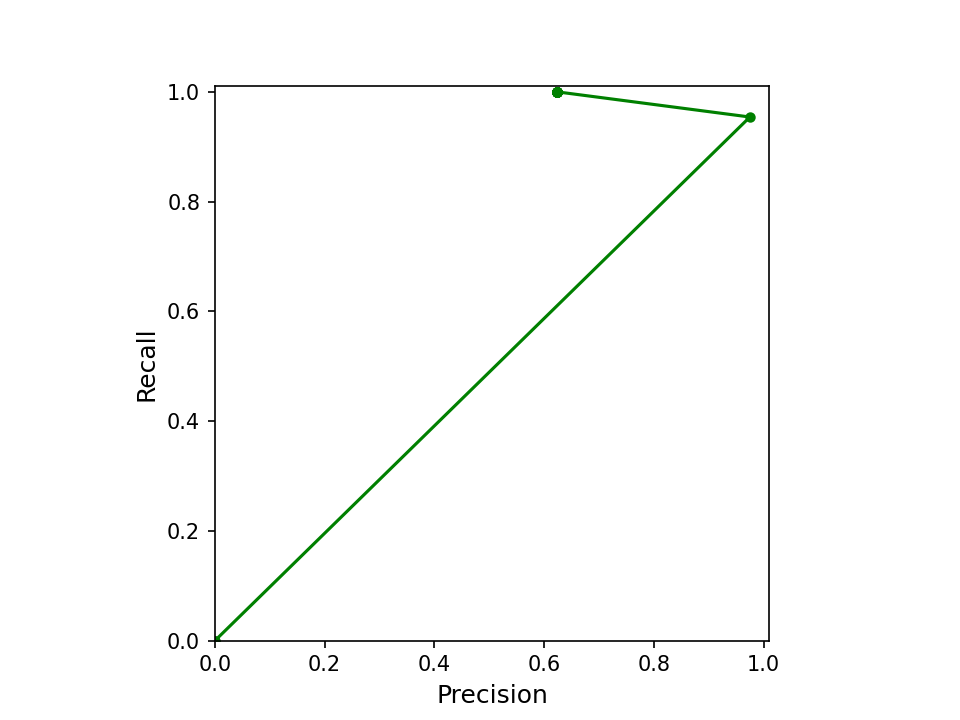

C:\Users\Evolu\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Evolu\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,recall,precision
threshold,,
-0.400430,1.000000,0.624176
0.701012,0.954225,0.974820
2.903896,0.000000,0.000000


In [146]:
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib notebook

clf = LogisticRegression().fit(X_train, y_train)
y_score = clf.decision_function(X_train)
thresholds = np.linspace(y_score.min()/4, y_score.max()/3.7, 20)

recall = []
precision= []
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
for threshold in  thresholds:
    clf.predict = lambda X: clf.predict_proba(X)[:,1]>threshold
    recall.append(recall_score(y_train,clf.predict(X_train)))
    precision.append(precision_score(y_train,clf.predict(X_train)))
df = pd.DataFrame({'threshold':  thresholds, 'recall': recall,'precision': precision})


plt.plot(precision, recall, 'g-o', markersize = 4, label='Precision-Recall Curve')
plt.xlabel('Precision', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.gca().set_aspect('equal')
# Avoid duplicates:  
df.groupby(['recall','precision']).last().reset_index().sort_values('threshold').set_index('threshold')

closest_zero threshold : -0.03011333844292685


<IPython.core.display.Javascript object>


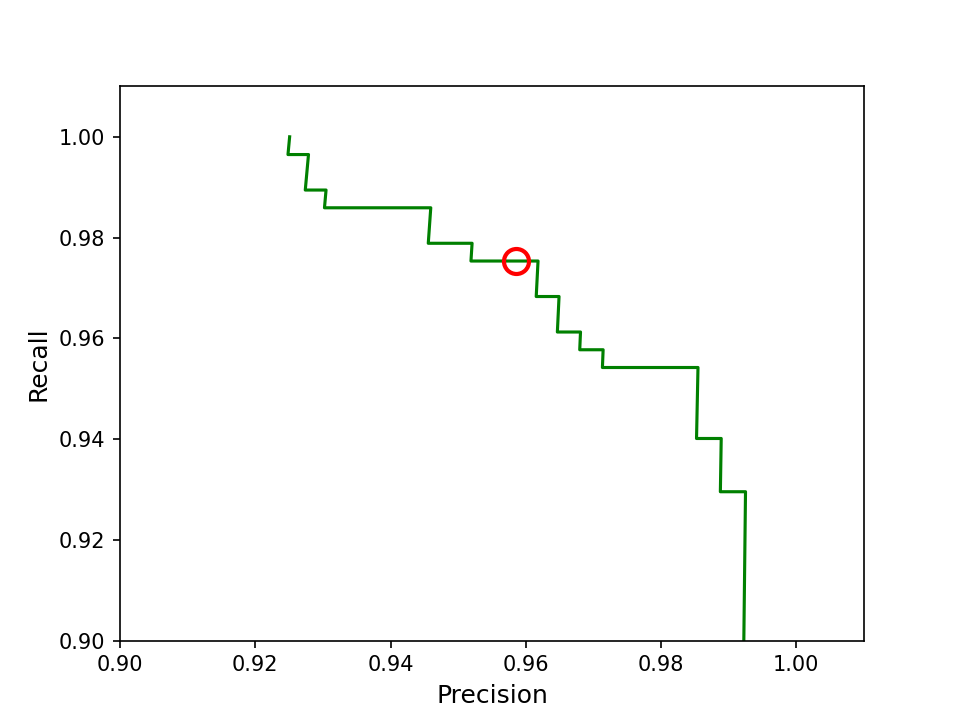

Text(0, 0.5, 'Recall')

In [147]:
from sklearn.metrics import precision_recall_curve

y_score = clf.decision_function(X_train)
precision, recall, thresholds = precision_recall_curve(y_train, y_score)

# print ('precision\n', precision)
# print ('recall:\n', recall)
# print ('thresholds:\n', thresholds)
closest_zero = np.argmin(np.abs(thresholds)) # the closest to zero refers to the default threshold of classifier
print ('closest_zero threshold : {}'.format(thresholds [closest_zero]))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.9, 1.01])
plt.ylim([0.9, 1.01])
plt.plot(precision, recall, 'g', markersize = 4, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=2)
plt.xlabel('Precision', fontsize=12)
plt.ylabel('Recall', fontsize=12)

#### Accuracy of Dummy classifier

In [148]:
from sklearn.dummy import  DummyClassifier
clf_dummy_majority= DummyClassifier(strategy='stratified').fit(X_train, y_train)
#  'stratified' generates predictions by respecting the training set’s class distribution
print ('Check it predicts by training set\'s:')
clf_dummy_majority.predict(X_test)[:30]

Check it predicts by training set's:


array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [149]:
print("train accuracy= {:.3%}".format(clf_dummy_majority.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf_dummy_majority.score (X_test, y_test)))
clf_dummy_majority= clf

train accuracy= 54.505%
test accuracy= 51.754%


#### Dumpy confusion matrix

In [150]:
confusion_matrix(y_test, y_test)

array([[41,  0],
       [ 0, 73]], dtype=int64)

In [151]:
y_dummy_majority= clf_dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_dummy_majority)
confusion

array([[41,  0],
       [73,  0]], dtype=int64)

In [152]:
clf = DummyClassifier (strategy='stratified', random_state=2022) # default: strategy='stratified'
clf.fit(X_train,y_train)
y_dummy_stratified = clf.predict(X_test)
confusion_matrix(y_test, y_dummy_stratified)

array([[17, 24],
       [30, 43]], dtype=int64)

In [153]:
cm= confusion_matrix(y_test, y_dummy_stratified )
cm.sum(axis = 0), cm.sum(axis = 0)[0]/cm.sum(axis = 0)[1]
# Since it predicts using sampling by distribution the prediction on test set may vary 

(array([47, 67], dtype=int64), 0.7014925373134329)

#### Another dataset - iris

#### При даному датасеті видає confusion_matrix не 2 на 2, а 3 на 3. Після чого вивести криві чи ROC не хоче. Видає помилку: object has no attribute 'decision_function'. Як уникнути помилку поки не знаю. Також при спробі виведення Precision Recall Curve, видає помилку: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [205]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Loading the breast cancer data set
iris_data = load_iris()

# Creating independent and dependent variables
X = iris_data.data
y = iris_data.target

# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

# Training a binary classifier using Random Forest Algorithm with default hyperparameters
clf_xgboost = XGBClassifier(use_label_encoder=False, eval_metric= 'logloss')
clf_xgboost.fit(X_train, y_train)

# Here X_test, y_test are the test data points
predictions = clf_xgboost.predict(X_test)

Train Data: (120, 4), (120,)
Train Data: (30, 4), (30,)


#### Accuracy: total numbers of correctly preticted to total numbers of samples

In [206]:
# Importing all necessary libraries
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

Accuracy of the classifier is: 0.9333333333333333


#### Confusion Matrix to show our evaluation with clf

[[ 9  0  0]
 [ 0  8  0]
 [ 0  2 11]]


C:\Users\Evolu\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<IPython.core.display.Javascript object>


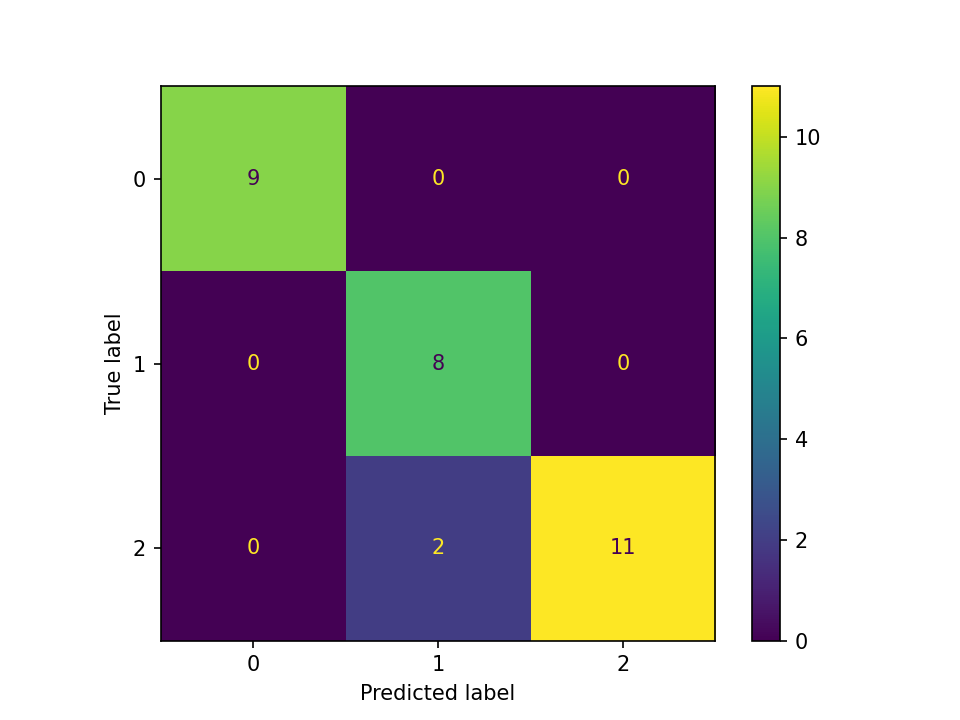

In [207]:
# importing all necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, predictions))

# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(clf_xgboost, X_test, y_test)
plt.show()

#### Precision (or Positive Predictive Value)

In [208]:
# Importing all necessary libraries
from sklearn.metrics import precision_score

# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions, average='weighted')}")

Precision Score of the classifier is: 0.9466666666666667


#### Recall (or Sensitivity or True Positive Rate)

In [209]:
# Importing all necessary libraries
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions, average='weighted')}")

Recall Score of the classifier is: 0.9333333333333333


#### F1 Score

In [210]:
# Importing all necessary libraries
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions, average='weighted')}")#### F1 Score

F1 Score of the classifier is: 0.9342592592592592


#### AUC-ROC Curve (Receiver Operating Characteristic Curve and Area Under Curve)

In [204]:
# Importing all necessary libraries
from sklearn.metrics import roc_curve, auc

y_score = clf_xgboost.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score) # third param is threshold
plt.figure()
plt.plot(fpr, tpr, '-', markersize = 4, label='Precision-Recall Curve')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title ('ROC curve')

AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

#### Precision Recall Curve

<IPython.core.display.Javascript object>


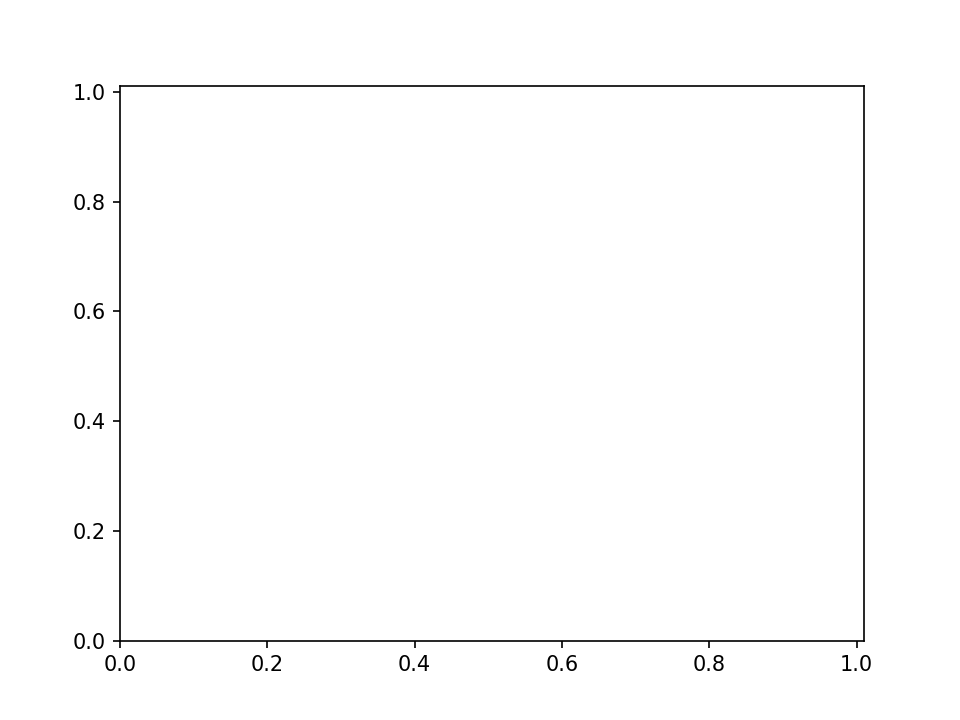

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [220]:
#from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib notebook

#clf = LogisticRegression().fit(X_train, y_train)
y_score = clf.decision_function(X_train)
thresholds = np.linspace(y_score.min()/4, y_score.max()/3.7, 20)

recall = []
precision= []
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
for threshold in  thresholds:
    clf.predict = lambda X: clf.predict_proba(X)[:,1]>threshold
    recall.append(recall_score(y_train,clf.predict(X_train)))
    precision.append(precision_score(y_train,clf.predict(X_train)))
df = pd.DataFrame({'threshold':  thresholds, 'recall': recall,'precision': precision})


plt.plot(precision, recall, 'g-o', markersize = 4, label='Precision-Recall Curve')
plt.xlabel('Precision', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.gca().set_aspect('equal')
# Avoid duplicates:  
df.groupby(['recall','precision']).last().reset_index().sort_values('threshold').set_index('threshold')